# 1 DataFrame的数据类型

# 1.1 使用df.dtypes查看数据类型

返回一个包含每列数据类型组成的序列

In [7]:
import pandas as pd
data = {
    'name':['Alice','Quark','baidu','360','google'],
    'age':[12,10,3,3,22],
    'city':['New York','Berg','Westingdon','beijing','sillicon'],
    'Price':[200,400,900,100,10000],
    'good':[True,True,True,False,True]
}

df_data = pd.DataFrame(data=data)
df_data

,name,age,city,Price,good
0,Alice,12,New York,200,True
1,Quark,10,Berg,400,True
2,baidu,3,Westingdon,900,True
3,360,3,beijing,100,False
4,google,22,sillicon,10000,True


In [8]:
df_data.dtypes

name     object
age       int64
city     object
Price     int64
good       bool
dtype: object

## 1.2 df.astype转换数据类型
df.astype(dtype):转换为指定的dtype类型

In [6]:
df_data['Price'].astype('float64')

0      200.0
1      400.0
2      900.0
3      100.0
4    10000.0
Name: Price, dtype: float64

## 1.3 使用df.select_dtypes根据数据类型筛选列

df.select_dtypes(include,exclude)

- include:指定要包含的数据类型
- exclude:指定要排除的数据类型

In [9]:
df_data.select_dtypes(include='object',exclude=['int64','bool'])

,name,city
0,Alice,New York
1,Quark,Berg
2,baidu,Westingdon
3,360,beijing
4,google,sillicon


# 2 DataFrame的列名与重命名

## 2.1 使用df.columns查看列名

In [10]:
df_data.columns

Index(['name', 'age', 'city', 'Price', 'good'], dtype='object')

## 2.2 使用.rename方法重命名

rename(mapper,index,columns,axis,inplace)

- mapper:一个字典，键是旧标签名，值是新标签名
    - index:行索引
    - columns：列标签
- axis:指定是行索引0或列名1
- inplace:是否在原地修改，默认False


In [11]:
df_data.rename(index={0:'s',1:'a',2:'b',3:'c',4:'d'})

,name,age,city,Price,good
s,Alice,12,New York,200,True
a,Quark,10,Berg,400,True
b,baidu,3,Westingdon,900,True
c,360,3,beijing,100,False
d,google,22,sillicon,10000,True


In [13]:
df_data.rename(columns={'name':'Name','age':'Age','city':'City','Price':'Price','good':'Good'},inplace=True)
df_data

,Name,Age,City,Price,Good
0,Alice,12,New York,200,True
1,Quark,10,Berg,400,True
2,baidu,3,Westingdon,900,True
3,360,3,beijing,100,False
4,google,22,sillicon,10000,True


## 2.3 直接赋值

- 将新的列名列表直接赋值给columns属性
- 将新的行索引赋值给index属性
- 直接对原表生效

In [14]:
data = {
    'name':['Alice','Quark','baidu','360','google'],
    'age':[12,10,3,3,22],
    'city':['New York','Berg','Westingdon','beijing','sillicon'],
    'Price':[200,400,900,100,10000],
    'good':[True,True,True,False,True]
}

df_data = pd.DataFrame(data=data)
df_data.columns = ['Name','Age','City','Price','Good']

In [17]:
df_data.index = ['a','b','c','d','e']
df_data.index

Index(['a', 'b', 'c', 'd', 'e'], dtype='object')

In [18]:
df_data.columns

Index(['Name', 'Age', 'City', 'Price', 'Good'], dtype='object')

# 3 DataFrame缺失值处理

## 3.1 缺失值

缺少某个值或者值不可用，常见缺失值有

- None：表示无值或缺失值，数据中缺少某个值
- NaN（Not a number):表示缺失或无效的数据，值不可用

### 3.1.1 None

### 3.1.2 np.nan,使用numpy包

In [20]:
import numpy as np
np.nan

nan

## 3.2 缺失值判断isna(),notna()

- df.isna():检查DataFrame中是否有缺失值，返回一个布尔型的DataFrame，True表示缺失
- df.notNa():检查DataFrame中是否有缺失值，返回一个布尔型的DataFrame，True表示不缺失

In [21]:
data = {
    'name':['Alice','Quark','baidu','360','google'],
    'age':[12,10,3,None,22],
    'city':['New York','Berg',None,'beijing','sillicon'],
    'Price':[200,400,np.nan,100,np.nan],
    'good':[True,True,True,False,True]
}
df_data = pd.DataFrame(data=data)

In [22]:
df_data.isna()

,name,age,city,Price,good
0,False,False,False,False,False
1,False,False,False,False,False
2,False,False,True,True,False
3,False,True,False,False,False
4,False,False,False,True,False


In [23]:
df_data.notna()

,name,age,city,Price,good
0,True,True,True,True,True
1,True,True,True,True,True
2,True,True,False,False,True
3,True,False,True,True,True
4,True,True,True,False,True


## 3.3 缺失值计数,对列进行求和


df.isna().sum()

In [24]:
# 对列求和,返回一个series
df_data.isna().sum()

name     0
age      1
city     1
Price    2
good     0
dtype: int64

In [25]:
# 再对series求和，返回整个表的缺失值个数
df_data.isna().sum().sum()

np.int64(4)

## 3.4 dropna():缺失值删除

df.dropna()

- axis: 0 表示删除包含缺失值的行，1表示删除包含缺失值的列
- thresh: 仅删除**非缺失值**小于指定值的行或列
- how:
    - how='any': 默认，如果某行某列有一个值是缺失的就删除整行整个列
    - how = 'all':如果某行或某列的所有值都缺失才删除
- subset = [col1,col2]:只考虑根据特定列中的缺失值来删除行/列
- inplace:True表示在原表上直接删除
- ignore_index: True表示删除后重置索引

In [34]:
data = {
    'name':['Alice','Quark','baidu','360','google'],
    'age':[12,10,3,None,22],
    'city':['New York','Berg',None,'beijing','sillicon'],
    'Price':[200,400,np.nan,100,np.nan],
    'good':[True,True,True,False,True]
}
df_data = pd.DataFrame(data=data)
df_data
df_data.isna().sum()

name     0
age      1
city     1
Price    2
good     0
dtype: int64

In [32]:
df_data.dropna(axis=0,how='all',inplace=False,subset=['city','age'],ignore_index=True)

,name,age,city,Price,good
0,Alice,12.0,New York,200.0,True
1,Quark,10.0,Berg,400.0,True
2,baidu,3.0,None,NaN,True
3,360,NaN,beijing,100.0,False
4,google,22.0,sillicon,NaN,True


In [36]:
df_data.dropna(axis=1,inplace=False,thresh=4)

,name,age,city,good
0,Alice,12.0,New York,True
1,Quark,10.0,Berg,True
2,baidu,3.0,None,True
3,360,NaN,beijing,False
4,google,22.0,sillicon,True


# 4 DataFrame中重复值处理

In [66]:
df_data.loc[len(df_data)] = ['Legion',12,'Wuhan',150,True]
df_data.loc[len(df_data)] = ['Legion',12,'Wuhan',150,True]
df_data

,name,age,city,Price,good
0,Alice,12.0,New York,2.000000e+02,True
1,Quark,10.0,Berg,4.000000e+02,True
2,baidu,3.0,None,NaN,True
3,360,NaN,beijing,1.000000e+02,False
4,google,22.0,sillicon,NaN,True
5,zhoujielun,35.0,Hong Kong,2.000000e+05,True
6,Peking University,120.0,Beijing,2.000000e+10,True
7,Legion,12.0,Wuhan,1.500000e+02,True
8,Legion,12.0,Wuhan,1.500000e+02,True



## 4.1 df.value_counts():重复值计算

df.value_counts(normalize,sort,ascending,dropna)

- normalize:True则返回各行在考虑的所有行出现的频率，False返回频数
- sort:如果为True，按照出现频率排序后返回,默认降序
- ascending:如果为True，按升序返回
- dropna:如果为True则包含缺失值的记录会被排除在计数之外，默认True

In [42]:
df_data.value_counts(normalize=True,sort=True,ascending=True)

name    age   city      Price  good
Alice   12.0  New York  200.0  True    0.2
Quark   10.0  Berg      400.0  True    0.2
Legion  12.0  Wuhan     150.0  True    0.6
Name: proportion, dtype: float64

In [43]:
df_data['name'].value_counts()

name
Legion    3
Alice     1
Quark     1
baidu     1
360       1
google    1
Name: count, dtype: int64


## 4.2 df.drop_duplicates():删除重复值

- subset:指定用于去重的列子集，默认为None
- keep:指定保留哪一个重复项，
    - first:默认，保留首次出现的重复项
    - last:保留最后一次出现的
    - False:删除所有重复项，不保留
- inplace:是否在原表上进行修改，默认False
- ignore_index:是否重置索引，True会对索引重新编号,False则保留原索引

In [48]:
df_data.drop_duplicates(subset='good',keep=False,inplace=False,ignore_index=False)

,name,age,city,Price,good
3,360,NaN,beijing,100.0,False


## 4.3 唯一值处理

### 4.3.1 df.unique()：返回数据中所有唯一值

In [67]:
df_data.loc[len(df_data)] = ['Legion',12,'Wuhan',150,True]
df_data.loc[len(df_data)] = ['Legion',12,'Wuhan',150,True]
df_data

,name,age,city,Price,good
0,Alice,12.0,New York,2.000000e+02,True
1,Quark,10.0,Berg,4.000000e+02,True
2,baidu,3.0,None,NaN,True
3,360,NaN,beijing,1.000000e+02,False
4,google,22.0,sillicon,NaN,True
5,zhoujielun,35.0,Hong Kong,2.000000e+05,True
6,Peking University,120.0,Beijing,2.000000e+10,True
7,Legion,12.0,Wuhan,1.500000e+02,True
8,Legion,12.0,Wuhan,1.500000e+02,True


In [68]:
df_data['name'].unique()

array(['Alice', 'Quark', 'baidu', '360', 'google', 'zhoujielun',
       'Peking University', 'Legion'], dtype=object)

### 4.3.2 df.nunique():返回每列唯一值的个数

df.nunique(dropna)

- dropna：默认为True，不考虑缺失值。False,缺失值也会作为一个唯一值估计

In [69]:
df_data.nunique(dropna=False)

name     8
age      7
city     8
Price    7
good     2
dtype: int64

# 5 sort_values():DataFrame的排序

df.sort_values()

- by:指定根据那一列或哪几列进行排序，如果是列表，按照从左到右的顺序排序
- ascending:True表示升序,默认升序，不论什么顺序缺失值会在最后
- inplace:是否修改原表
- ignore_index:是否重置索引

In [49]:
data = {
    'name':['Alice','Quark','baidu','360','google','zhoujielun','Peking University'],
    'age':[12,10,3,None,22,35,120],
    'city':['New York','Berg',None,'beijing','sillicon','Hong Kong','Beijing'],
    'Price':[200,400,np.nan,100,np.nan,200000,2e10],
    'good':[True,True,True,False,True,True,True]
}
df_data = pd.DataFrame(data=data)
df_data

,name,age,city,Price,good
0,Alice,12.0,New York,2.000000e+02,True
1,Quark,10.0,Berg,4.000000e+02,True
2,baidu,3.0,None,NaN,True
3,360,NaN,beijing,1.000000e+02,False
4,google,22.0,sillicon,NaN,True
5,zhoujielun,35.0,Hong Kong,2.000000e+05,True
6,Peking University,120.0,Beijing,2.000000e+10,True


In [51]:
df_data.sort_values(by='age',inplace=False,ascending=False)

,name,age,city,Price,good
6,Peking University,120.0,Beijing,2.000000e+10,True
5,zhoujielun,35.0,Hong Kong,2.000000e+05,True
4,google,22.0,sillicon,NaN,True
0,Alice,12.0,New York,2.000000e+02,True
1,Quark,10.0,Berg,4.000000e+02,True
2,baidu,3.0,None,NaN,True
3,360,NaN,beijing,1.000000e+02,False


# 6 DataFrame其他属性和方法

## 6.1 df.shape：返回行数和列数

## 6.2 df.head():返回前几行,默认为5

## 6.3 df.tail():返回最后几行

## 6.4 df.info():返回概括信息，包括行列数、Null值数、数据类型

## 6.5 df.cumsum():累加求和

df.cumsum()

- axis:指定计算方向，axis=0，沿列方向计算，默认，axis=1,沿行方向计算
- 沿计算方向，后面的元素加上前面所有的元素等于当前元素

> 差分类似

In [53]:
data = {
    'name':['Alice','Quark','baidu','360','google','zhoujielun','Peking University'],
    'age':[12,10,3,None,22,35,120],
    'city':['New York','Berg',None,'beijing','sillicon','Hong Kong','Beijing'],
    'Price':[200,400,np.nan,100,np.nan,200000,2e10],
    'good':[True,True,True,False,True,True,True]
}
df_data = pd.DataFrame(data=data)
df_data.shape

(7, 5)

In [54]:
df_data.head(3)

,name,age,city,Price,good
0,Alice,12.0,New York,200.0,True
1,Quark,10.0,Berg,400.0,True
2,baidu,3.0,None,NaN,True


In [55]:
df_data.tail(2)

,name,age,city,Price,good
5,zhoujielun,35.0,Hong Kong,2.000000e+05,True
6,Peking University,120.0,Beijing,2.000000e+10,True


In [56]:
df_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7 entries, 0 to 6
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   name    7 non-null      object 
 1   age     6 non-null      float64
 2   city    6 non-null      object 
 3   Price   5 non-null      float64
 4   good    7 non-null      bool   
dtypes: bool(1), float64(2), object(2)
memory usage: 359.0+ bytes


In [57]:
data = {
    'A':[1,2,3],
    'B':[4,5,6],
}
data = pd.DataFrame(data=data)

In [58]:
data.cumsum(axis=0)

,A,B
0,1,4
1,3,9
2,6,15


In [59]:
data.cumsum(axis=1)

,A,B
0,1,5
1,2,7
2,3,9


## 6.6 diff差分方法

df.diff(periods=1,axis=0)

- periods:差分周期，默认是1
- axis:0代表沿行计算，默认为0，1代表沿列差分
- 沿计算方向，后面的元素减上前面的元素等于当前元素，前面的元素是当前位置减去差分周期确定

In [60]:
import pandas as pd
import numpy as np

# 设置种子
np.random.seed(1)
# 设置生成一个5*5的整数矩阵
data = np.random.randint(10,100,size=(5,5))
columns = ['a','b','c','d','e']

data = pd.DataFrame(data=data,columns=columns)
data

,a,b,c,d,e
0,47,22,82,19,85
1,15,89,74,26,11
2,86,81,16,35,60
3,30,28,94,21,38
4,39,24,60,78,97


### 6.6.1 一阶差分

In [61]:
data.diff(axis=0)

,a,b,c,d,e
0,NaN,NaN,NaN,NaN,NaN
1,-32.0,67.0,-8.0,7.0,-74.0
2,71.0,-8.0,-58.0,9.0,49.0
3,-56.0,-53.0,78.0,-14.0,-22.0
4,9.0,-4.0,-34.0,57.0,59.0


In [62]:
# 周期为2的差分
data.diff(axis=0,periods=2)

,a,b,c,d,e
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,39.0,59.0,-66.0,16.0,-25.0
3,15.0,-61.0,20.0,-5.0,27.0
4,-47.0,-57.0,44.0,43.0,37.0


### 6.6.2 多阶差分，不停地后面连接.diff()

In [64]:
### 二阶差分

data.diff().diff()

,a,b,c,d,e
0,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN
2,103.0,-75.0,-50.0,2.0,123.0
3,-127.0,-45.0,136.0,-23.0,-71.0
4,65.0,49.0,-112.0,71.0,81.0


# 7 DataFrame中数据描述性统计度量

In [2]:
data = {
    'name':['Alice','Quark','baidu','360','google','zhoujielun','Peking University'],
    'age':[12,10,3,None,22,35,120],
    'city':['New York','Berg',None,'beijing','sillicon','Hong Kong','Beijing'],
    'Price':[200,400,np.nan,100,np.nan,200000,2e10],
    'good':[True,True,True,False,True,True,True]
}
df_data = pd.DataFrame(data=data)
df_data

NameError: name 'np' is not defined

## 7.1 df.sum()：求和

## 7.2 df.mean():求平均值

## 7.3 df.median():求中位数

## 7.4 df.mode():求众数

## 7.2 df.max()，df.min():求最大、最小值

In [72]:
df_data['age'].sum()

np.float64(202.0)

In [73]:
df_data['age'].mean()

np.float64(33.666666666666664)

In [74]:
df_data['age'].median()

np.float64(17.0)

In [76]:
# 出现次数相同且最多则都为众数
df_data['good'].mode()

0    True
Name: good, dtype: bool

In [77]:
df_data['age'].max()

np.float64(120.0)

In [78]:
df_data['age'].min()

np.float64(3.0)

## 7.7 df.std():标准差

标准差是方差的平方根，衡量分散程度，计算公式：

$$
标准差 = \sqrt{方差} = \sqrt{\frac{\sum(x_i - \mu) ^ 2}{N - 1}}
$$


$ \mu $ 表示数据集的平均值， $ N $ 表示数据数量 $ x_i $ 表示第 $ i $ 个样本数据
## 7.8 df.var():方差

$$
方差 = \frac{\sum(x_i - \mu) ^ 2}{N - 1}
$$


$ \mu $ 表示数据集的平均值， $ N $ 表示数据数量 $ x_i $ 表示第 $ i $ 个样本数据


In [82]:
df_data.loc[:,['age','Price']].std()

age      4.372947e+01
Price    8.944249e+09
dtype: float64

In [83]:
df_data.loc[:,['age','Price']].var()

age      1.912267e+03
Price    7.999960e+19
dtype: float64

## 7.9 df.quantile()分位数

将数据集进行排序分成包含记录相等的四等分，四等分处的数值，上四分位数25%，中位数50%，下四分位数75%,默认只有中位数

In [90]:
df_data['age'].quantile([0,0.25,0.5,0.6,0.75,1])

0.00      3.00
0.25     10.50
0.50     17.00
0.60     22.00
0.75     31.75
1.00    120.00
Name: age, dtype: float64

## 7.10 df.skew()偏态系数

描述数据分布对称性的统计量，计算公式

$$
偏态系数 = \frac{\sum_{i=1}^n(x_i - \overline{x})}{n * s^3}
$$

其中：
- $ x_i $是数据集中第i个数据点
- $ \overline{x} $数据集的均值
- $ s $数据集的标准差
- $ n $数据条数

数值含义
- 如果是正数，表示正偏，即数据的右尾（较大值）比左尾（较小值）更长
- 如果是负数，表示负偏，即数据的右尾（较大值）比左尾（较小值）更短
- 如果是0，表示分布对称

> 助记：从左到右为正方向，右边更长是正偏,左边更长是负偏

In [91]:
df_data['age'].skew()

np.float64(2.115321307936215)

## 7.11 df.kurt()峰态系数

描述数据分布尖峭程度的统计量，计算公式为：
$$
峰态系数 = \frac{\sum_{i=1}^n(x_i - \mu)^4/n}{(\sum_{i=1}^n(x_i - \mu)^4/n)^2}
$$

- 系数为0表示数据分布与正态分布的陡峭程度相同
- 系数为正表示比正态分布更陡峭，称为尖顶峰（leptokurtic）
- 系数为负表示比正态分布更平缓，称为平顶峰（platykurtic）

In [92]:
df_data['age'].kurt()

np.float64(4.6595455374934485)

## 7.12 df[].count()计数，返回非缺失值的数据条数

> df.count（）是对所有列计数

In [95]:
df_data['age'].count()

np.int64(6)

## 7.13 df.describe():描述性统计,对前面内容的汇总

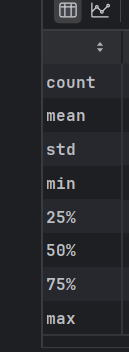

In [96]:
df_data.describe()

,age,Price
count,6.000000,5.000000e+00
mean,33.666667,4.000040e+09
std,43.729471,8.944249e+09
min,3.000000,1.000000e+02
25%,10.500000,2.000000e+02
50%,17.000000,4.000000e+02
75%,31.750000,2.000000e+05
max,120.000000,2.000000e+10


## 7.14 df.corr()计算数值型变量的相关系数矩阵

In [ ]:
df_data.corr()